In [1]:
# 2020년 9월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 202009]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
312444,202009,20,여가/스포츠,2013,여행,남성,50대,성인자녀가구,서울특별시,강동구,길동,4204543,85
312455,202009,11,패션잡화,1112,가방,여성,40대,초중고자녀가구,서울특별시,양천구,목동,7081463,72
312456,202009,11,패션잡화,1111,신발,여성,40대,초중고자녀가구,서울특별시,양천구,목동,3520400,72
312462,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,강북구,번동,1998274,89
312466,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,동작구,본동,305109,14
312479,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,마포구,중동,212630,10
312489,202009,20,여가/스포츠,2013,여행,여성,20대,1인가구,서울특별시,도봉구,창동,4730428,99
312490,202009,16,식품,1612,음료,여성,60대 이상,노인가구,서울특별시,도봉구,창동,352290,27
312505,202009,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,구로구,항동,3540612,14
312506,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,구로구,항동,1117577,58


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    29895
남성    16177
Name: 성별, dtype: int64


<AxesSubplot:>

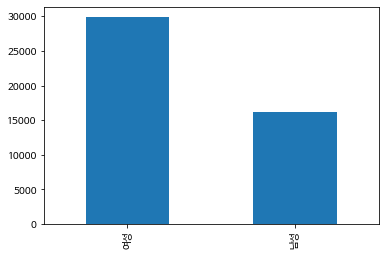

In [8]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['20대', '50대', '40대', '30대', '60대 이상', '20세 미만']
40대       14517
30대       12465
20대        7762
50대        7608
60대 이상     3295
20세 미만      425
Name: 연령, dtype: int64


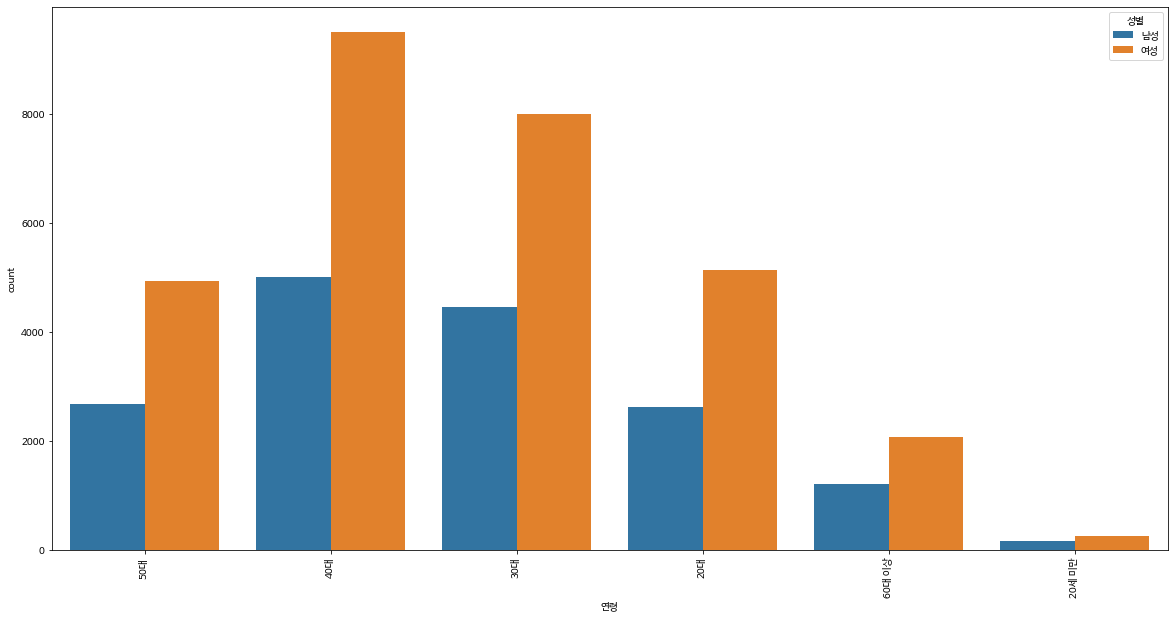

여성 연령 분포 및 순위
40대       9501
30대       7998
20대       5137
50대       4933
60대 이상    2075
20세 미만     251
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       5016
30대       4467
50대       2675
20대       2625
60대 이상    1220
20세 미만     174
Name: 연령, dtype: int64
40대       1.0
30대       2.0
50대       3.0
20대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


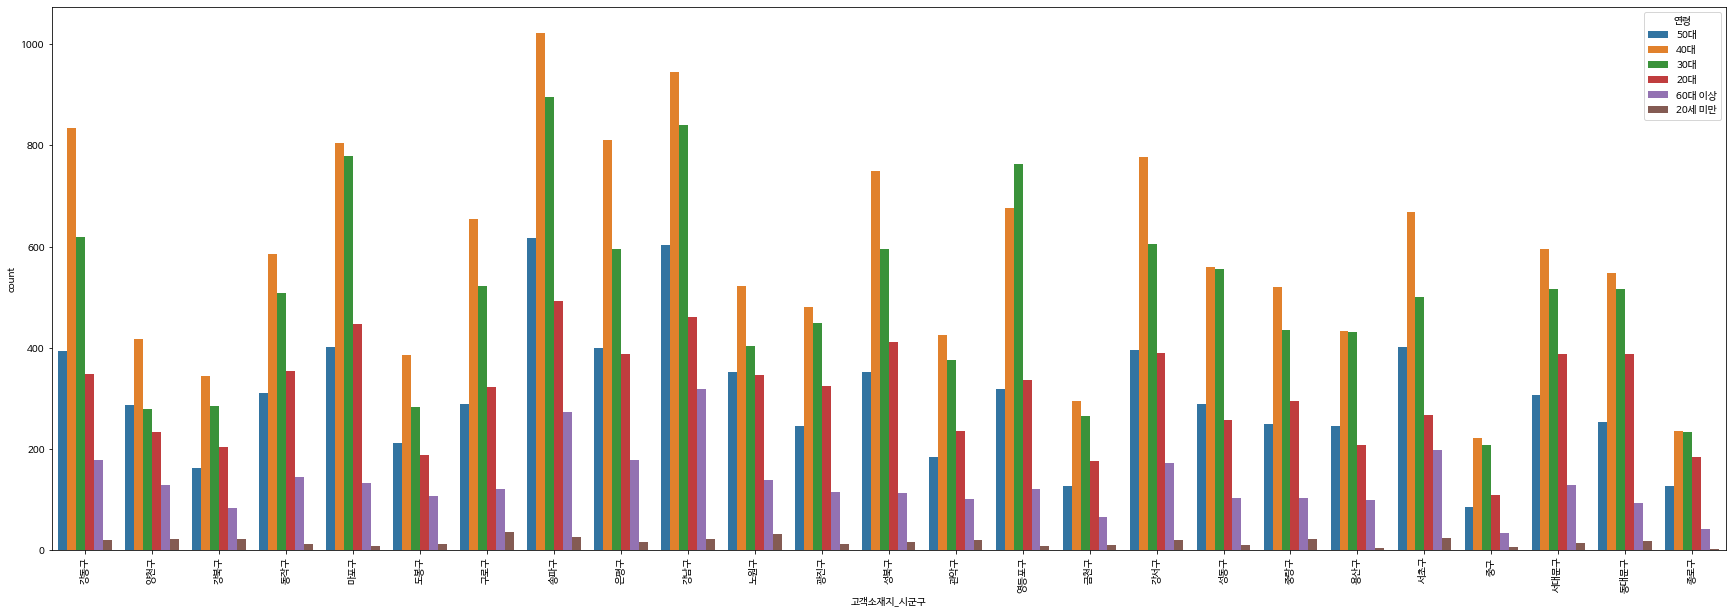

In [9]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['금천구', '관악구', '강동구', '영등포구', '노원구', '동대문구', '마포구', '은평구', '강서구', '서대문구', '서초구', '종로구', '양천구', '도봉구', '강남구', '중구', '성북구', '동작구', '구로구', '용산구', '강북구', '성동구', '송파구', '중랑구', '광진구']


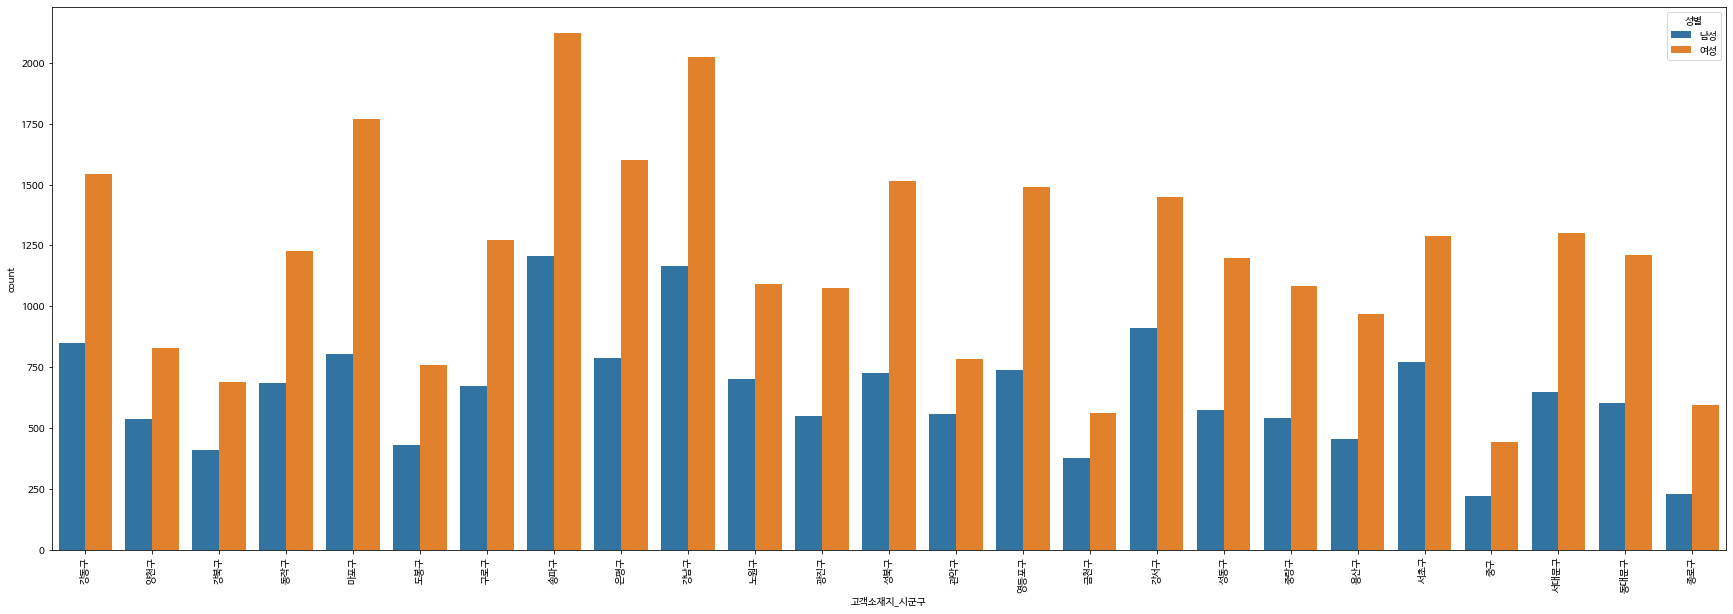

송파구    1.0
강남구    2.0
마포구    3.0
은평구    4.0
강동구    5.0
Name: 고객소재지_시군구, dtype: float64
송파구    1.0
강남구    2.0
강서구    3.0
강동구    4.0
마포구    5.0
Name: 고객소재지_시군구, dtype: float64


In [10]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

###################################### 필요한지에 대해서 의문
# print(df_1903['고객소재지_시군구'].value_counts()) 
# 이게 의미하는 바가 여성 의류 13건(==> 여성 의류별 1건) +  남성 의류 2건(==> 남성 의류별 1건) +  ,,,
# 이렇게 진행되는데 그냥 시군구별row를 개수 세서 저장하는건데 필요한지는 의문
# 아니면 내가 이걸 잘못 이해하고 있는 것일 수도 있음

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['노인가구', '1인가구', '성인자녀가구', '신혼영유아가구', '초중고자녀가구']
신혼영유아가구    14939
초중고자녀가구     9807
1인가구        9444
성인자녀가구      8587
노인가구        3295
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

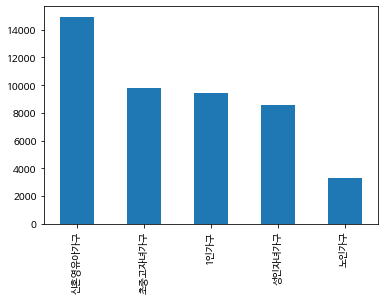

In [11]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

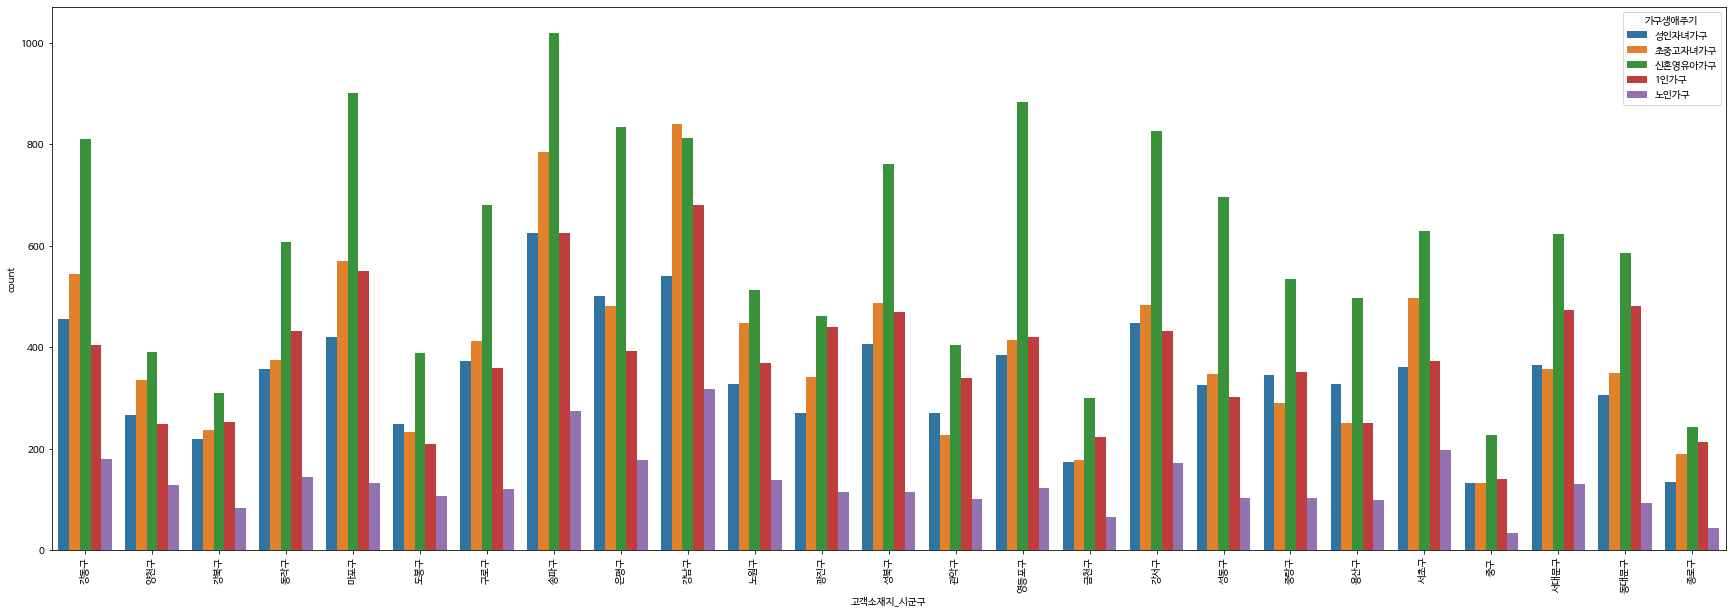

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 이렇게 한번에 보는 것도 방법이지만 따로 시군구 별로 plot해서 만드는거 계획 예정
# 추가로 명수라고 해야 되나 그 건수?도 추가 예정
# ex) 군포시 1인가구 : 123, 노인가구 : 123


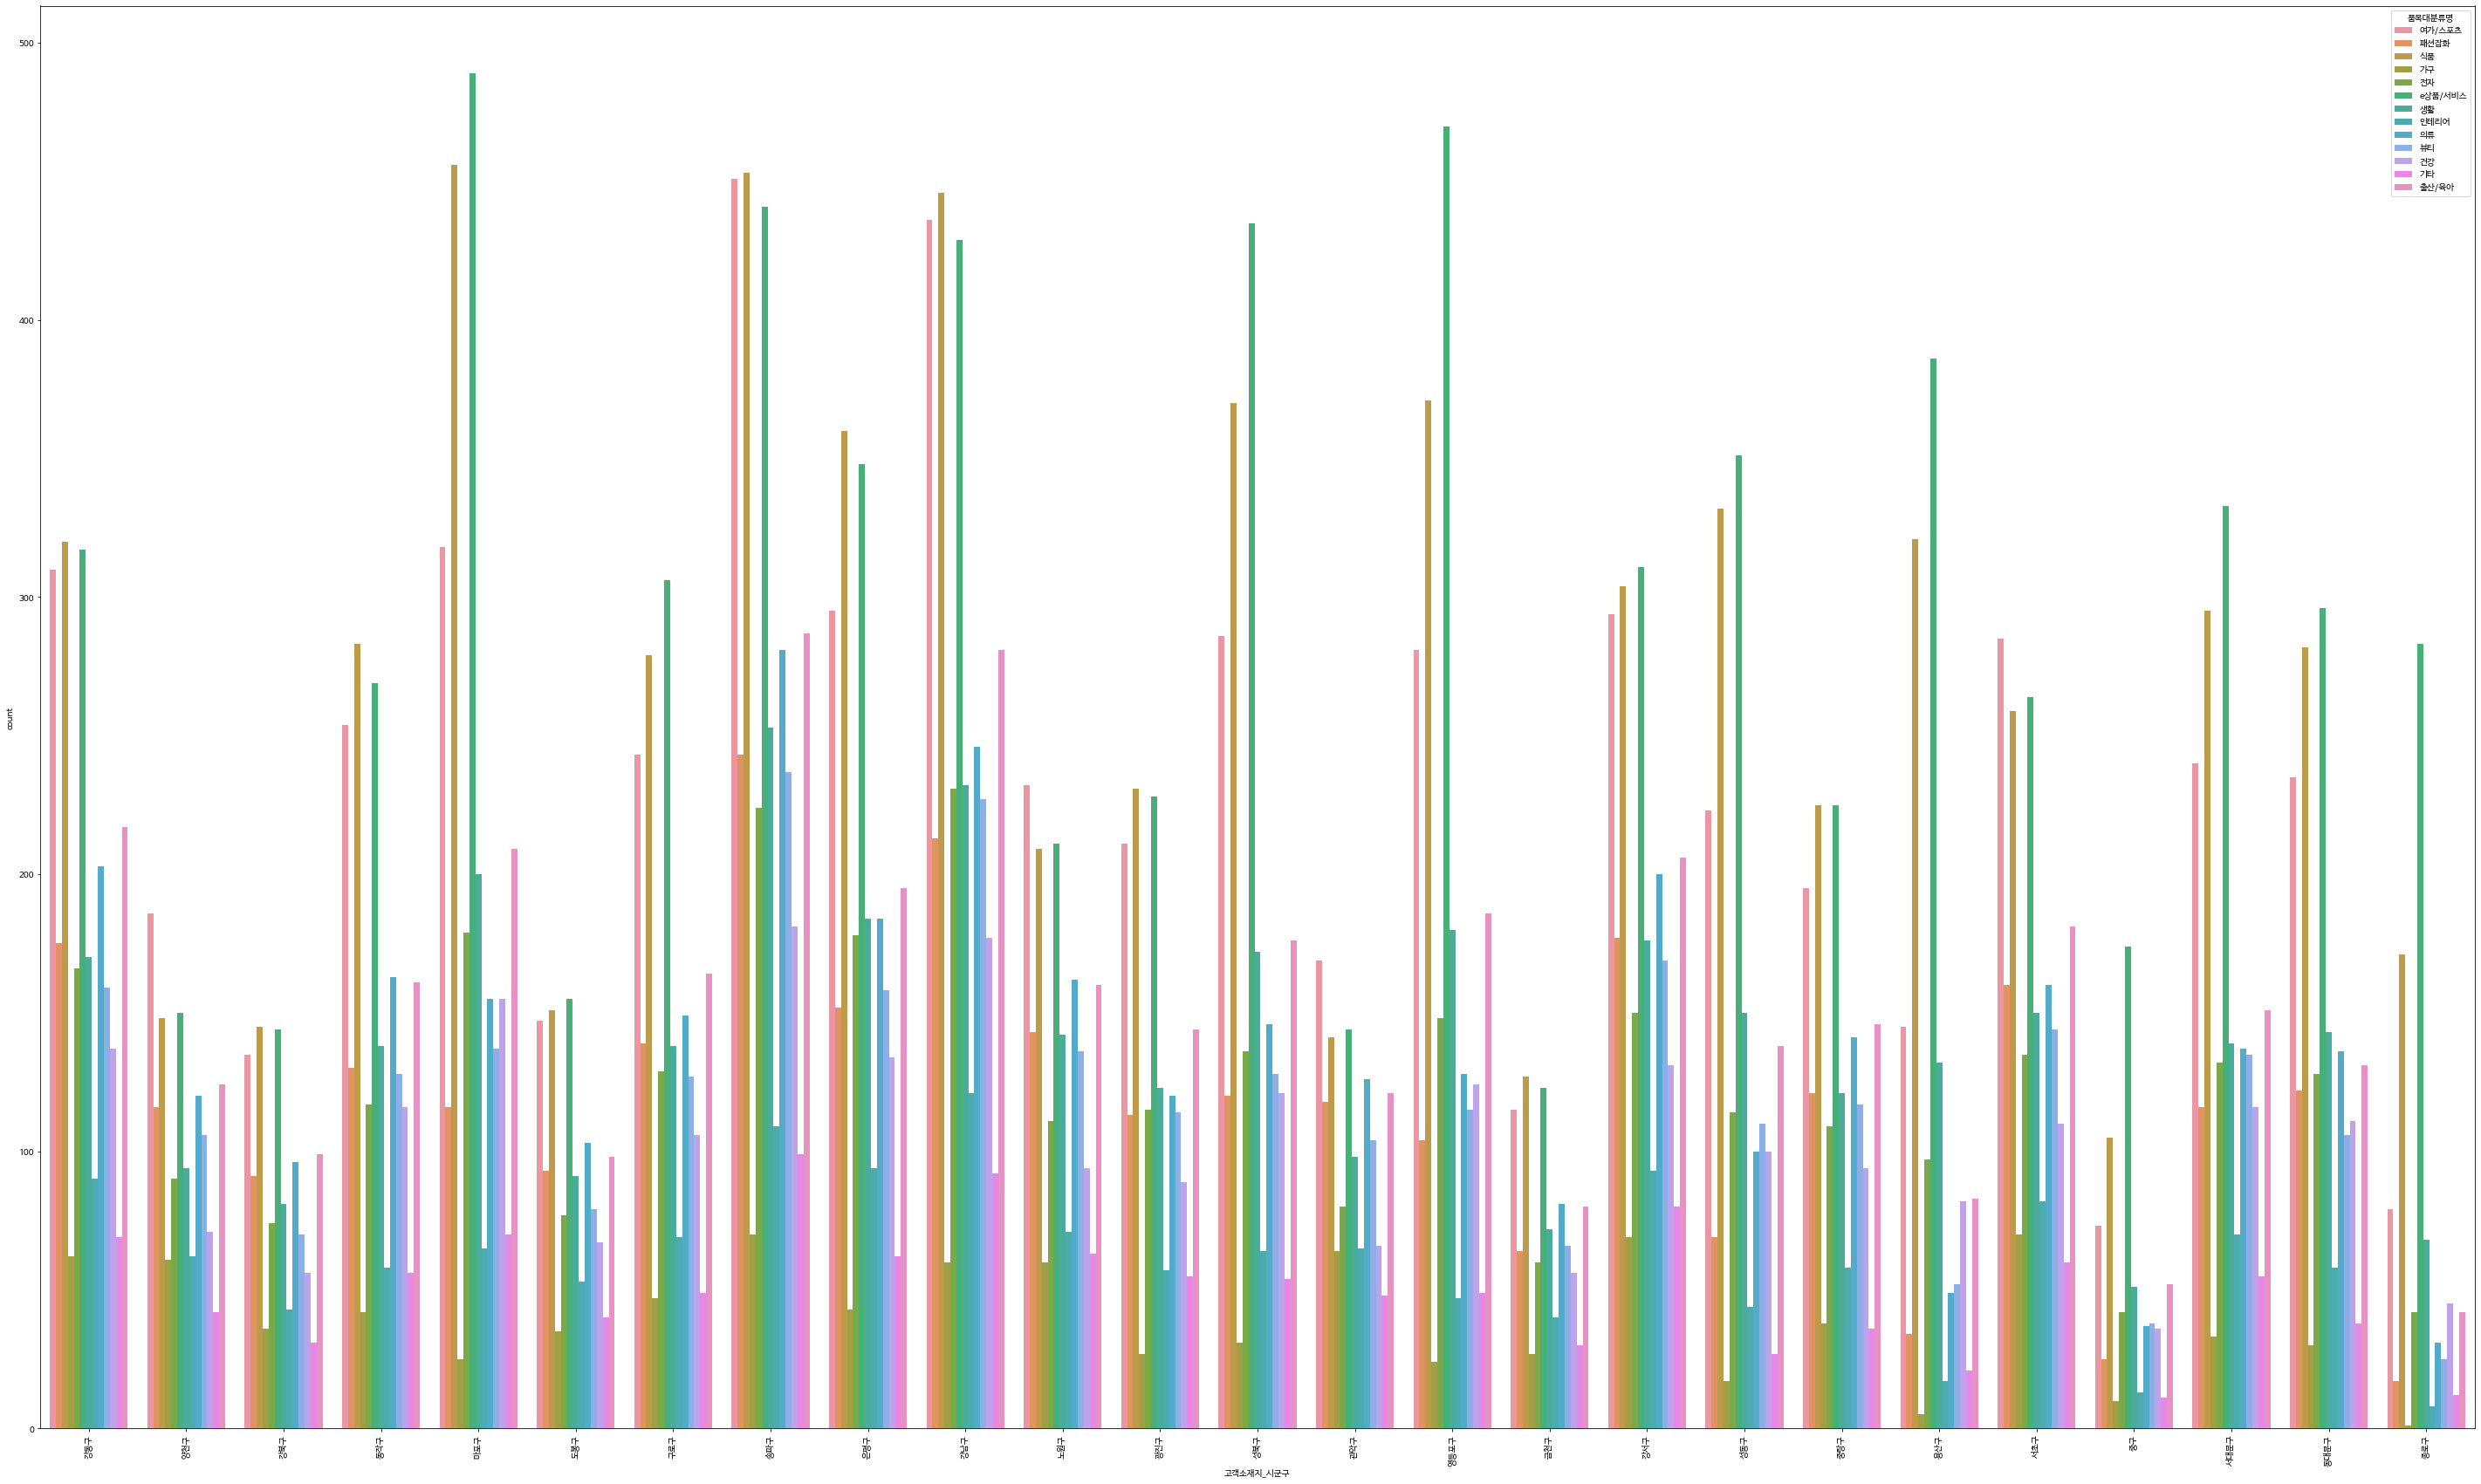

In [13]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

고객소재지_시군구
강남구     12520293899
강동구      6981422792
강북구      4089970714
강서구      9401676385
관악구      9022382179
광진구      5522828142
구로구      6125753284
금천구      3309295645
노원구      7972459398
도봉구      3987798775
동대문구     4921688749
동작구      6273633404
마포구      5873532551
서대문구     5792290013
서초구      9293117103
성동구      4094471560
성북구      5681943317
송파구     11797766561
양천구      7942937302
영등포구     5658732282
용산구      3184075532
은평구      6731466060
종로구      1457114399
중구       1662646854
중랑구      4902936674
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

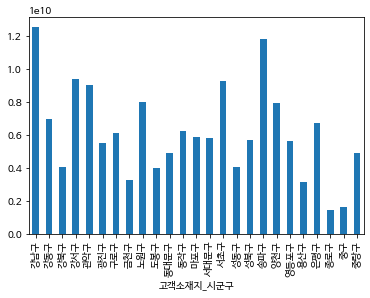

In [14]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

고객소재지_시군구
강남구     224012
강동구     159808
강북구      98499
강서구     214264
관악구     209825
광진구     125992
구로구     142503
금천구      76969
노원구     185647
도봉구      92639
동대문구    118584
동작구     140903
마포구     132617
서대문구    125760
서초구     160894
성동구      87656
성북구     130329
송파구     235542
양천구     160110
영등포구    125369
용산구      61541
은평구     153894
종로구      34212
중구       36636
중랑구     119095
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

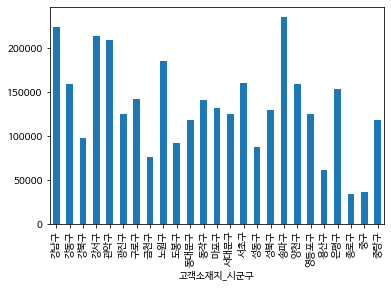

In [15]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()